In [2]:
# NOTE: This file may need to be moved up one directory (..) so that dsptools can be imported.

# IPython magic to enable the widget backend from ipympl for interactive plots
%matplotlib widget 

# IPython magic to autoreload external modules automatically before executing 
# user code
%reload_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import ipywidgets as widgets
from ipywidgets import interact, fixed

from dsptools.trapezoidal_pulse import TrapezoidalPulse
from dsptools.plot import winfft
from dsptools.plot import plot_spectrum
from dsptools.plot import plot_timeseries
from dsptools.plot import plot_filter_response

# Use ggplot plot style sheet
plt.style.use('ggplot')


interactive(children=(IntSlider(value=10, description='width', max=20, min=1), FloatSlider(value=5.0, descript…

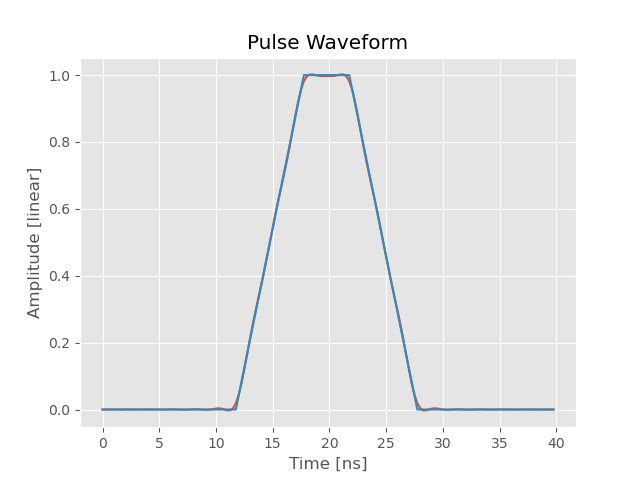

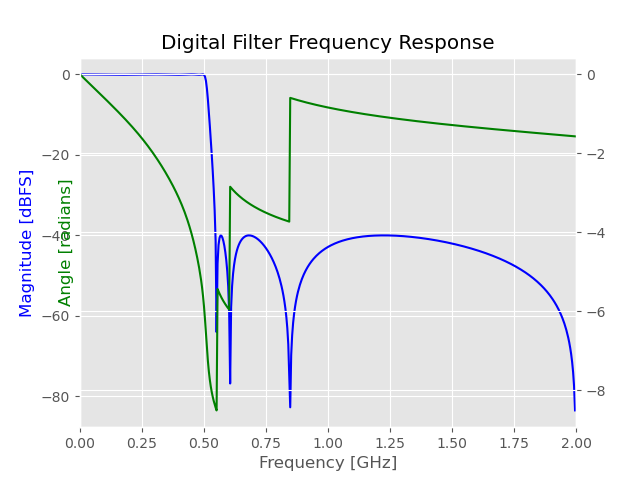

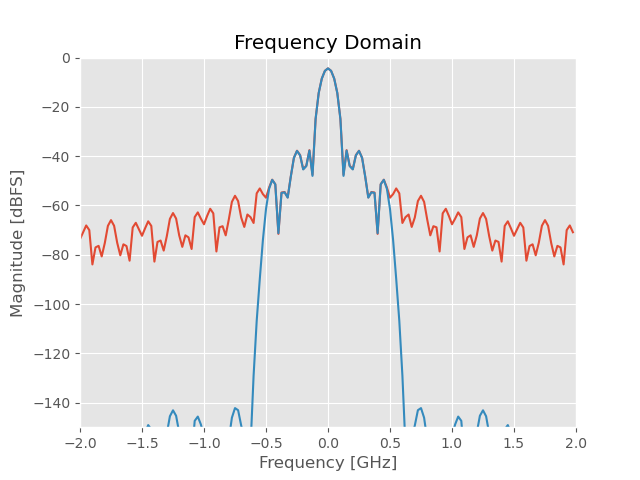

In [3]:
# This example is using gui widgets using the interact decorator


# sample rate
fs = 4e9

# create the pulse object with initial values, incl waveform length
p=TrapezoidalPulse(fs=fs, state_levels=[0,1], padding_factor=3)

# compute time indicies from waveform length
t = np.arange(0, len(p.waveform)/p.fs, 1/p.fs)

# create figures
fig, ax = plt.subplots()
fig2 = plt.figure()
fig3, ax3 = plt.subplots()


# interactive mode ON
plt.ion()
 

# update is called every time a gui widget changes position
@widgets.interact(
                  width=(1, 20, 1),         # ns
                  risetime=(0, 10, 0.1),    # ns
                  falltime=(0, 10, 0.1),    # ns
                  filter=(1, fs/4/1e6, 1),  # MHz
                  autofilter=False          # override filter slider and use auto mode
                  )
def update(width, risetime, falltime, filter, autofilter):
    filter = "auto" if autofilter else filter*1e6
    
    p.update(
             width=(width*1e-9), 
             risetime=(risetime*1e-9), 
             falltime=(falltime*1e-9), 
             filter=filter)

    
    plt.figure(fig)
    ax.clear()
    plot_timeseries(p.waveform_filtered, fs=fs)
    plot_timeseries(p.waveform, fs=fs)
    plt.title('Pulse Waveform')
    
    
    b, a = p.filter["coefficients"]
    w, h = signal.freqz(b, a)
    plt.figure(fig2)
    plot_filter_response(w, h, fs=fs)
    
    
    plt.figure(fig3)
    ax3.clear()
    plot_spectrum(*winfft(p.waveform, fs=fs))
    plot_spectrum(*winfft(p.waveform_filtered, fs=fs))

interactive(children=(IntSlider(value=55, description='width', min=10), IntSlider(value=20, description='riset…

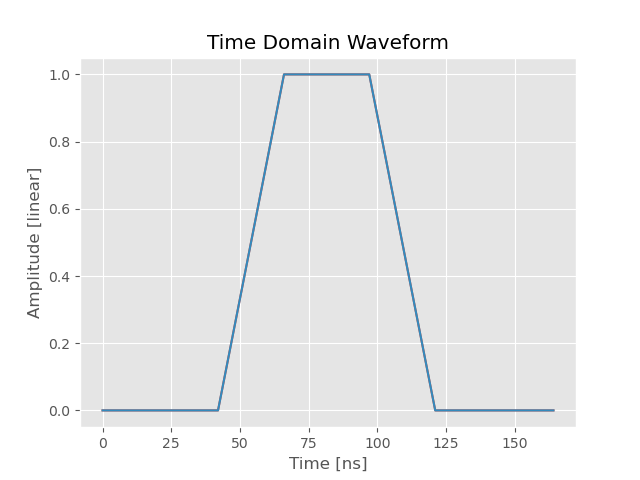

In [4]:
# This example is using the interact method for responsive gui widgets


fs = 1e9
plt.figure() 

def f(*args, **kwargs):
    p = TrapezoidalPulse(*args, **kwargs)
    plot_timeseries(p.waveform, fs=fs, clear=True)
    plot_timeseries(p.waveform_filtered, fs=fs)
 
p = interact(f,
        fs=fixed(fs),
        width=(10, 100, 1),
        risetime=(0,40,2),
        falltime=(0,40,2),
        filter=[('None', None), ('auto', 'auto'), ('cutoff', 'cutoff')],
        cutoff=(1, 100, 1),
        timeunit=fixed(1e-9),
        frequnit=fixed(1e6)
        )


Length of waveform is 200
Length of vec is 200
Length of FFT is 200


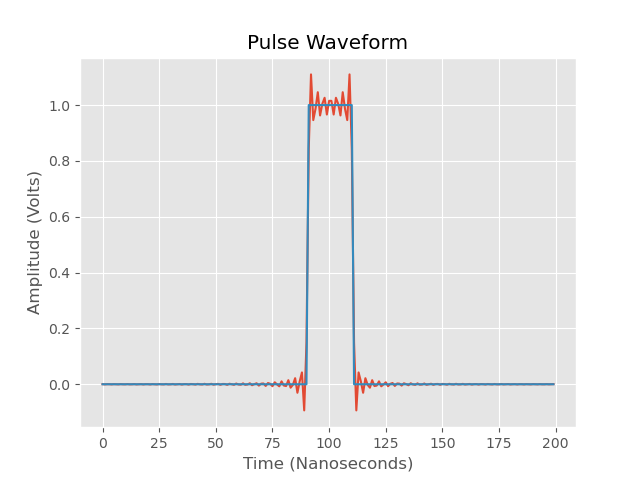

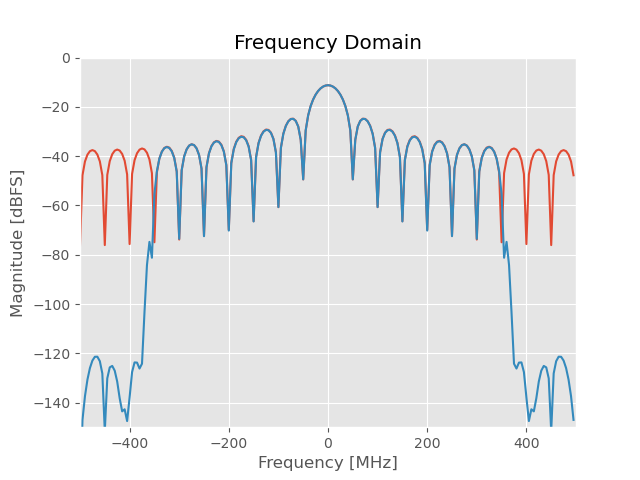

In [5]:
# This is an example of directly plotting the Trapezoidal Pulse waveform
# in time domain and frequency domain


fs = 1e9

p=TrapezoidalPulse(fs=fs,
                   width=20e-9,
                   risetime=1e-9,
                   falltime=1e-9,
                   padding_factor=9,
                   filter="auto")
t = np.arange(0, len(p.waveform)/p.fs, 1/p.fs)

fig1, ax1 = plt.subplots()
ax1.clear()
ax1.set_title('Pulse Waveform')
ax1.set_xlabel("Time (Nanoseconds)")
ax1.set_ylabel("Amplitude (Volts)")
ax1.plot(t/1e-9, p.waveform_filtered)
ax1.plot(t/1e-9, p.waveform)

plt.figure()
freqs, amps = winfft(p.waveform, fs=fs)
print(f"Length of waveform is {len(p.waveform)}")
print(f"Length of vec is {len(amps)}")
print(f"Length of FFT is {len(amps)}")
plot_spectrum(*winfft(p.waveform, fs=fs))
plot_spectrum(*winfft(p.waveform_filtered, fs=fs))


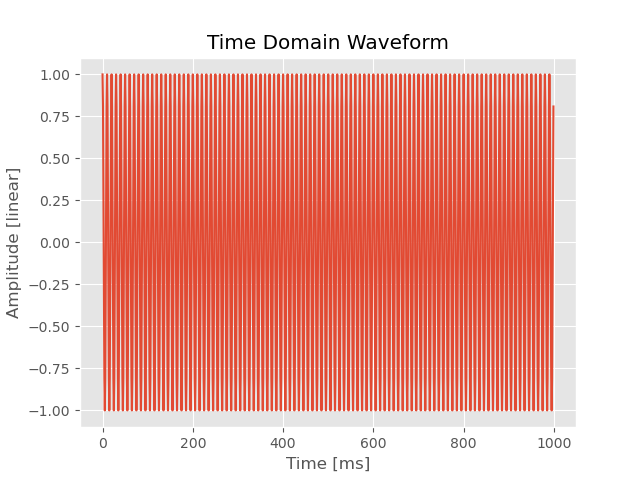

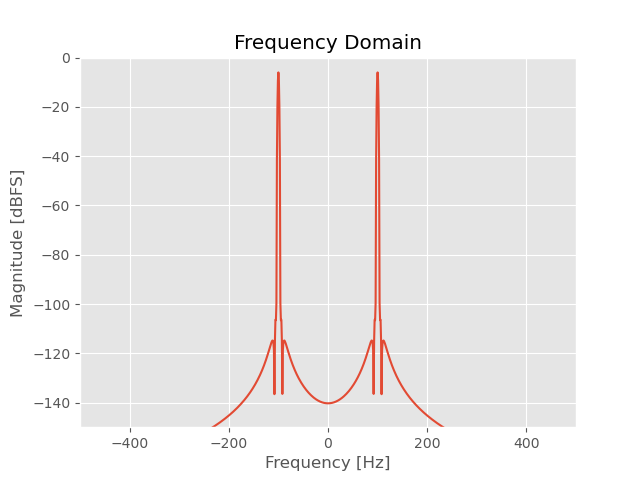

In [6]:
# This is an example of calculating and ploting the timeseries and spectrum


fs = 1e3
omega = 2*np.pi

t = np.arange(0, 1, 1/fs)
f = 100
signal = np.exp(1j*omega*f*t)

plt.figure()
plot_timeseries(np.real(signal), fs=fs)

plt.figure()
plot_spectrum(*winfft(np.real(signal), fs=fs))

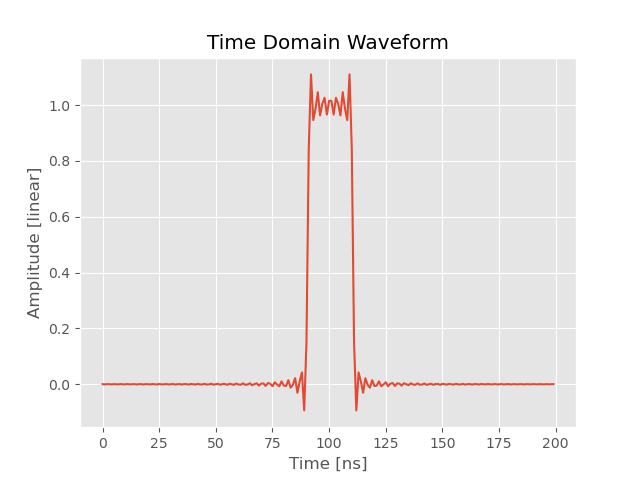

In [7]:
# This is an example of generating the time series with Trapezoidal Pulse and 
# plotting that with the timeseries function


fs = 1e9
p=TrapezoidalPulse(fs=fs,
                   width=20e-9,
                   risetime=1e-9,
                   falltime=1e-9,
                   padding_factor=9,
                   filter="auto")
t = np.arange(0, len(p.waveform)/p.fs, 1/p.fs)


plt.figure()
plot_timeseries(p.waveform_filtered, fs=fs)